# Projeto 2 - Data Science Academy
## Fundamentos de Linguagem Python para Análise de Dados e Data Science
### Gustavo Carvalho Augusto Vilas Boas

## Exercício proposto: Análise de arquivo CSV e resposta de 10 perguntas de negócio baseadas na base de dados fornecida

### Introdução

Primeiramente, listando as perguntas de negócio que nortearão o projeto:
##### Pergunta de negócio 1:
Qual cidade com maior valor de venda de produtos da categoria 'Office Supplies'?

##### Pergunta de negócio 2:
Qual o total de vendas por data do pedido?
Demonstre o resultado através de um gráfico de barras.

##### Pergunta de negócio 3:
Qual o total de vendas por estado?
Demonstre o resultado através de um gráfico de barras.

##### Pergunta de negócio 4:
Quais são as 10 cidades com maior total de vendas?
Demonstre o resultado através de um gráfico de barras.

##### Pergunta de negócio 5:
Qual segmento teve o maior total de vendas?
Demonstre o resultado através de um gráfico de pizza.

##### Pergunta de negócio 6:
Qual o total de vendas por segmento e por ano?

##### Pergunta de negócio 7:
Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:
- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
Quantas vendas receberiam 15% de Desconto?

##### Pergunta de negócio 8:
Considere que a empresa decida conceder o desconto de 15% do item anterior.
Qual seria a média do valor de venda antes e depois do desconto?

##### Pergunta de negócio 9:
Qual a média de vendas por segmento, por ano e por mês?
Demonstre o resultado através de gráfico de linha.

##### Pergunta de negócio 10:
Qual o total de vendas Por categoria e subcategoria, considerando somente as top 12 subcategorias?
Demonstre tudo através de um único gráfico.

## Imports de bibliotecas úteis e carregamento de arquivo

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [7]:
data = pd.read_csv('dataset.csv')

In [8]:
df = pd.DataFrame(data)
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de negócio 1
### Qual cidade com maior valor de venda de produtos da categoria 'Office Supplies'?

Para encontrar a cidade com maior venda de Office Supplies, primeiro serão selecionadas somente as vendas dessa categoria e, com isso, criado um dataframe somente com os dados selecionados.

In [11]:
df_Office_Supplies = df[df.Categoria.str.contains('Office Supplies')]
df_Office_Supplies.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900


Após isso, será feito um agrupamento por cidade, para ser efetuada a soma dos valores de venda independente das subcategorias. Feito o agrupamento com a soma, será classificado por ordem decrescente no valor de venda, sendo possível encontrar o maior valor facilmente como o primeiro item.

In [13]:
df_cidade_Office_Supplies = df_Office_Supplies[['Cidade', 'Valor_Venda']].groupby(['Cidade']).sum().sort_values('Valor_Venda', ascending=False)
df_cidade_Office_Supplies.head(1)

,Valor_Venda
Cidade,
New York City,68362.814


Ou seja, a cidade com maior venda de produtos da categoria Office Supplies é a cidade de Nova York.

## Pergunta de negócio 2
### Qual o total de vendas por data do pedido? 
#### Demonstre o resultado através de um gráfico de barras.

Para calcular a quantidade de vendas por data é necessário separar os dados por data.

In [17]:
df.Data_Pedido.dtype

dtype('O')

Como verificado, a coluna de data tem o tipo 'O', ou seja, é do tipo objeto, o que significa que é tratada como string. Para utilizar a data para fazer o *plot* do gráfico, é necessário transformar a coluna para o tipo específico de data.

In [19]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst=True, format="%d/%m/%Y")
df.Data_Pedido.dtype

dtype('<M8[ns]')

Após isso, precisa-se contar as instâncias que aparecem cada data, é utilizado o *value_counts*, e para organizar por data de forma ascendente, utiliza-se o *sort_index*.

In [21]:
df_data_pedido = df[['Data_Pedido', 'Valor_Venda']].groupby(['Data_Pedido']).sum().sort_values('Valor_Venda', ascending=False)
df_data_pedido.head()

,Valor_Venda
Data_Pedido,
2015-03-18,28106.716
2017-10-02,18452.972
2018-10-22,15158.877
2018-03-23,14816.068
2015-09-08,14228.428


Para o *plot*, o eixo *x* será o índice do *count_data_pedido* enquanto a quantidade de vendas será o eixo *y*, aplicando o *to_numpy* para transformar em array e o *flatten* para deixar em uma dimensão. Para evitar poluição no eixo *x*, os ticks foram definidos para cada ano usando o *Year_Locator*.

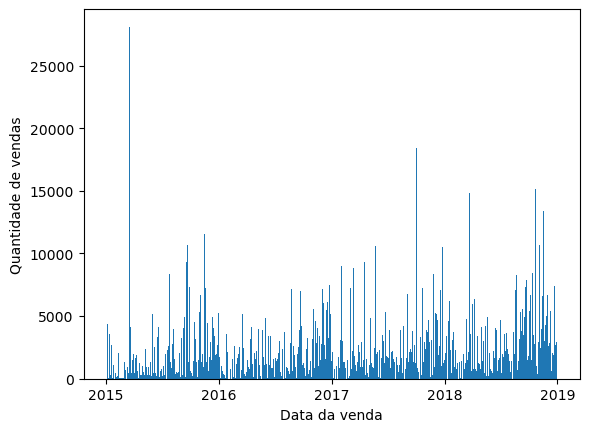

In [23]:
ax = plt.subplot(111)
ax.bar(df_data_pedido.index, df_data_pedido.to_numpy().flatten(), width=2)
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Data da venda')
plt.ylabel('Quantidade de vendas')
plt.show()

## Pergunta de negócio 3
### Qual o total de vendas por estado? 
#### Demonstre o resultado através de um gráfico de barras.

Para montar o gráfico de barras, primeiro é feita a contagem das vendas por estado de forma similar ao problema anterior.

In [26]:
df_estado_venda = df[['Estado', 'Valor_Venda']].groupby(['Estado']).sum().sort_values('Valor_Venda', ascending=False)
df_estado_venda.head()

,Valor_Venda
Estado,
California,442927.0975
New York,304536.4010
Texas,163549.8602
Washington,133826.0060
Pennsylvania,114411.6800


Para o *plot*, como são muitos estados, para a legenda ficar legível, é necessário formatar o tamanho da figura, rotacionar os *ticks* do eixo *x* e para melhor compreensão, adicionar os valores de cada barra usando o *bar_label*.

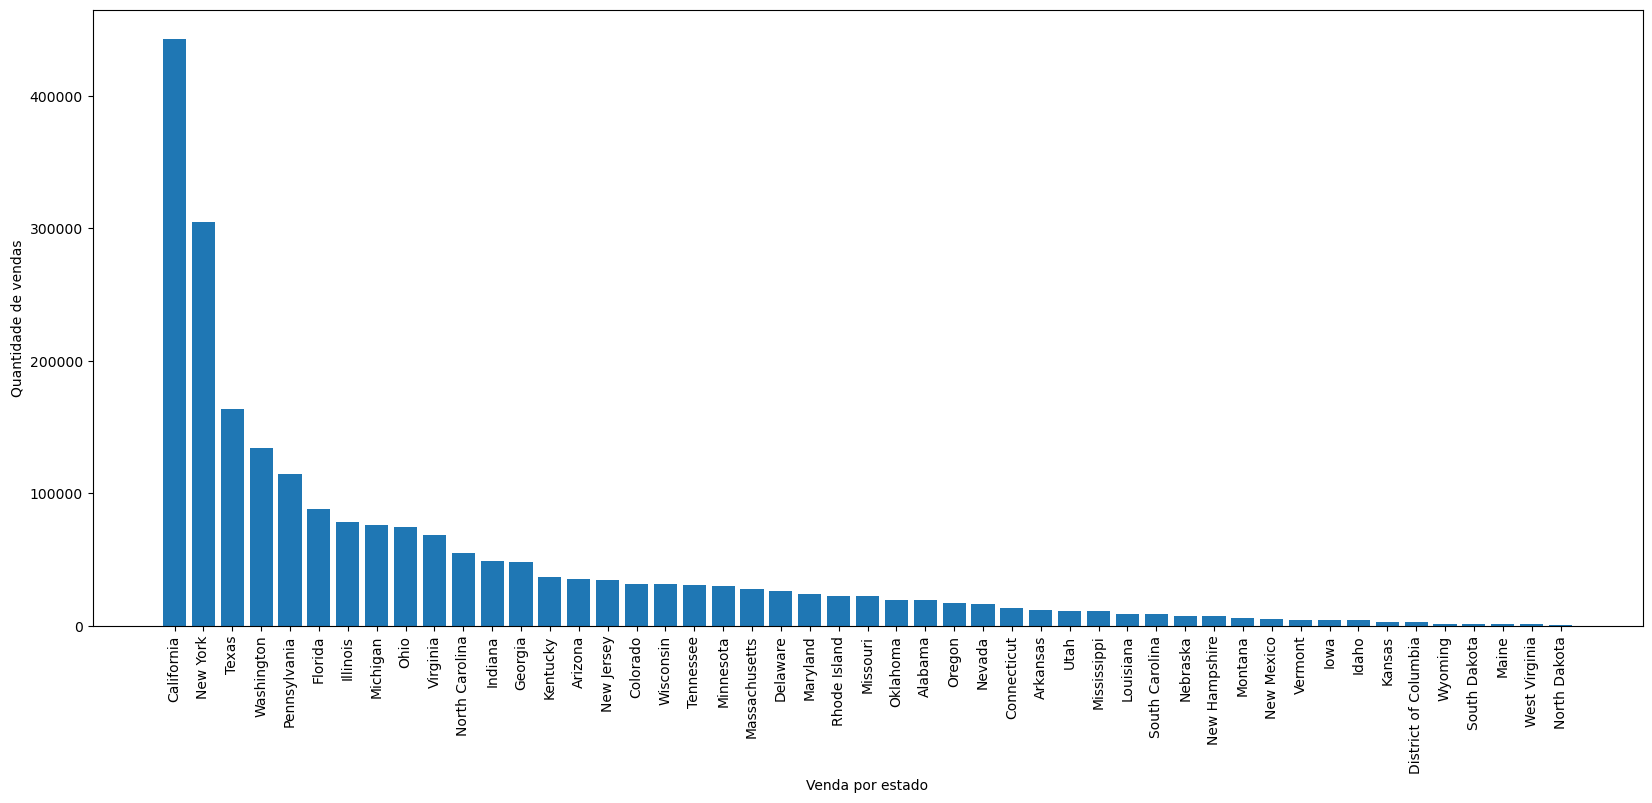

In [28]:
plt.figure(figsize=(20,8))
ax = plt.subplot()
ax.bar(df_estado_venda.index, df_estado_venda.to_numpy().flatten())
ax.tick_params(axis='x', labelrotation=90)
plt.xlabel('Venda por estado')
plt.ylabel('Quantidade de vendas')

plt.show()

## Pergunta de negócio 4
### Quais são as 10 cidades com maior total de vendas?
#### Demonstre o resultado através de um gráfico de barras.

Similarmente ao problema passado, é feita a contagem, porém agora por cidade.

In [31]:
df_cidade_venda = df[['Cidade', 'Valor_Venda']].groupby(['Cidade']).sum().sort_values('Valor_Venda', ascending=False)
df_cidade_venda.head(10)

,Valor_Venda
Cidade,
New York City,251749.2190
Los Angeles,171654.6330
Seattle,114725.4780
San Francisco,107489.9520
Philadelphia,107197.8030
Houston,61590.1868
San Diego,47458.3790
Chicago,46974.3430
Jacksonville,44713.1830


Para fazer a seleção das dez cidades que mais venderam, é feito um *slicing* no contador feito anteriormente para o *plot*.

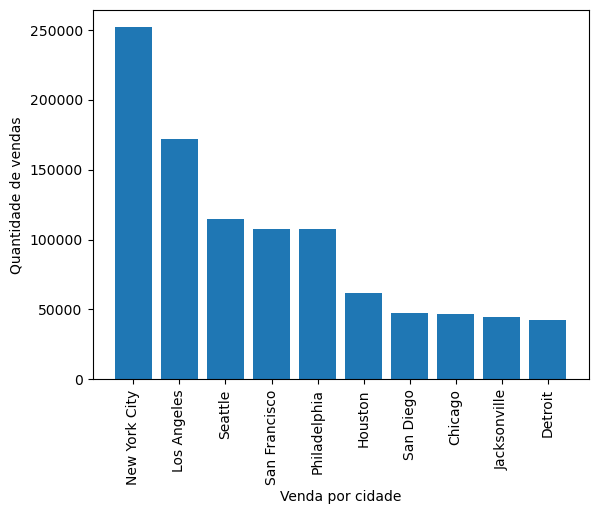

In [33]:
ax = plt.subplot()
ax.bar(df_cidade_venda.index[:10], df_cidade_venda[:10].to_numpy().flatten())
ax.tick_params(axis='x', labelrotation=90)
plt.xlabel('Venda por cidade')
plt.ylabel('Quantidade de vendas')

plt.show()

## Pergunta de negócio 5
### Qual segmento teve o maior total de vendas?
#### Demonstre o resultado através de um gráfico de pizza.

Para definir o segmento com maior total de vendas, assim como nos outros gráficos, será feito o agrupamento, soma dos valores de venda, porém agora utilizando um gráfico de pizza.

In [36]:
df_segmento = df[['Segmento', 'Valor_Venda']].groupby(['Segmento']).sum().sort_values('Valor_Venda', ascending=False)
df_segmento

,Valor_Venda
Segmento,
Consumer,1.133834e+06
Corporate,6.792322e+05
Home Office,4.224914e+05


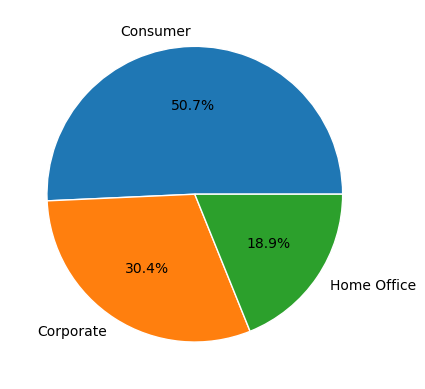

In [37]:
# plot
fig, ax = plt.subplots()
ax.pie(df_segmento.to_numpy().flatten(), labels=df_segmento.index, wedgeprops={"linewidth": 1, "edgecolor": "white"}, autopct='%1.1f%%')

plt.show()

## Pergunta de negócio 6
### Qual o total de vendas por segmento e por ano?

Primeiramente, para agrupar por ano, uma nova coluna é criada armazenando os anos, baseada na coluna de data.

In [40]:
df['Ano_Pedido'] = pd.DatetimeIndex(df['Data_Pedido']).year
df['Ano_Pedido'].head()

0    2017
1    2017
2    2017
3    2016
4    2016
Name: Ano_Pedido, dtype: int32

Após isso, o agrupamento é feito pela ordem Segmento - Ano, com a soma dos valores de venda para cada ano em cada segmento.

In [42]:
df_segmento_ano = df[['Segmento', 'Ano_Pedido', 'Valor_Venda']].groupby(['Segmento', 'Ano_Pedido']).sum()
df_segmento_ano

Valor_Venda
Segmento    Ano_Pedido             
Consumer    2015        256719.9166
            2016        265295.2593
            2017        288459.5572
            2018        323359.6019
Corporate   2015        125819.5957
            2016        114643.1229
            2017        203266.7398
            2018        235502.7284
Home Office 2015         88229.0878
            2016         74134.1332
            2017        103639.6270
            2018        156488.5849

## Pergunta de negócio 7
### Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:
#### - Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
#### - Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
### Quantas vendas receberiam 15% de Desconto?

Para definir o desconto, é feito um *query* com a condição especificada, nesse caso, vendas com valor superior a 1000.

In [45]:
df_desconto = df.query('Valor_Venda > 1000')

Verificando o formato do novo *Dataframe* podemos encontrar que 457 vendas receberiam 15% de desconto.

In [47]:
df_desconto.shape

(457, 12)

## Pergunta de negócio 8
### Considere que a empresa decida conceder o desconto de 15% do item anterior. Qual seria a média do valor de venda antes e depois do desconto?

O valor médio de venda antes do desconto pode ser encontrado com o *mean*.

In [50]:
df['Valor_Venda'].mean()

230.4698922371134

Para alterar somente os valores acima de 1000, utiliza-se uma máscara com o *mask*, mantendo o *inplace* como falso para não alterar a base de dados, como verificado posteriormente.

In [52]:
df['Valor_Venda'].mask(df['Valor_Venda']>1000, df['Valor_Venda']*0.85, inplace=False).mean()

215.51038958350514

In [53]:
df['Valor_Venda'].mean()

230.4698922371134

## Pergunta de negócio 9
### Qual a média de vendas por segmento, por ano e por mês?
#### Demonstre o resultado através de gráfico de linha.

Como já foi criada uma coluna para o ano, será criada uma para o mês e após isso será feito o agrupamento calculando a média do valor de venda.

In [56]:
df['Mes_Pedido'] = pd.DatetimeIndex(df['Data_Pedido']).month

In [57]:
df_segmento_ano_mes = df[['Segmento', 'Ano_Pedido', 'Mes_Pedido', 'Valor_Venda']].groupby(['Segmento', 'Ano_Pedido', 'Mes_Pedido']).mean()
df_segmento_ano_mes

Valor_Venda
Segmento    Ano_Pedido Mes_Pedido             
Consumer    2015       1            146.736787
                       2            117.327926
                       3            152.170564
                       4            189.762750
                       5            191.337439
...                                        ...
Home Office 2018       8            176.160606
                       9            249.140597
                       10           412.576597
                       11           247.519423
                       12           224.523983

[144 rows x 1 columns]

Para uma melhor visualização ao *plotar* os gráficos, serão separados por ano, mostrando a média de cada mês, com as linhas legendadas e de cores diferentes para cada segmento. Para isso, utiliza-se o *isin* no índice do agrupamento para encontrar os anos referentes a cada segmento da seguinte forma.

In [59]:
df_segmento_ano_mes[df_segmento_ano_mes.index.isin([('Consumer',2015)])]

Valor_Venda
Segmento Ano_Pedido Mes_Pedido             
Consumer 2015       1            146.736787
                    2            117.327926
                    3            152.170564
                    4            189.762750
                    5            191.337439
                    6            280.348963
                    7            275.812286
                    8            195.232044
                    9            376.404026
                    10           228.826718
                    11           286.227686
                    12           248.133962

Para *plotar* os gráficos em formato *2x2* foram feitas algumas listas para *plotar* em laços aninhados e uma variável auxiliar para variar o ano. 

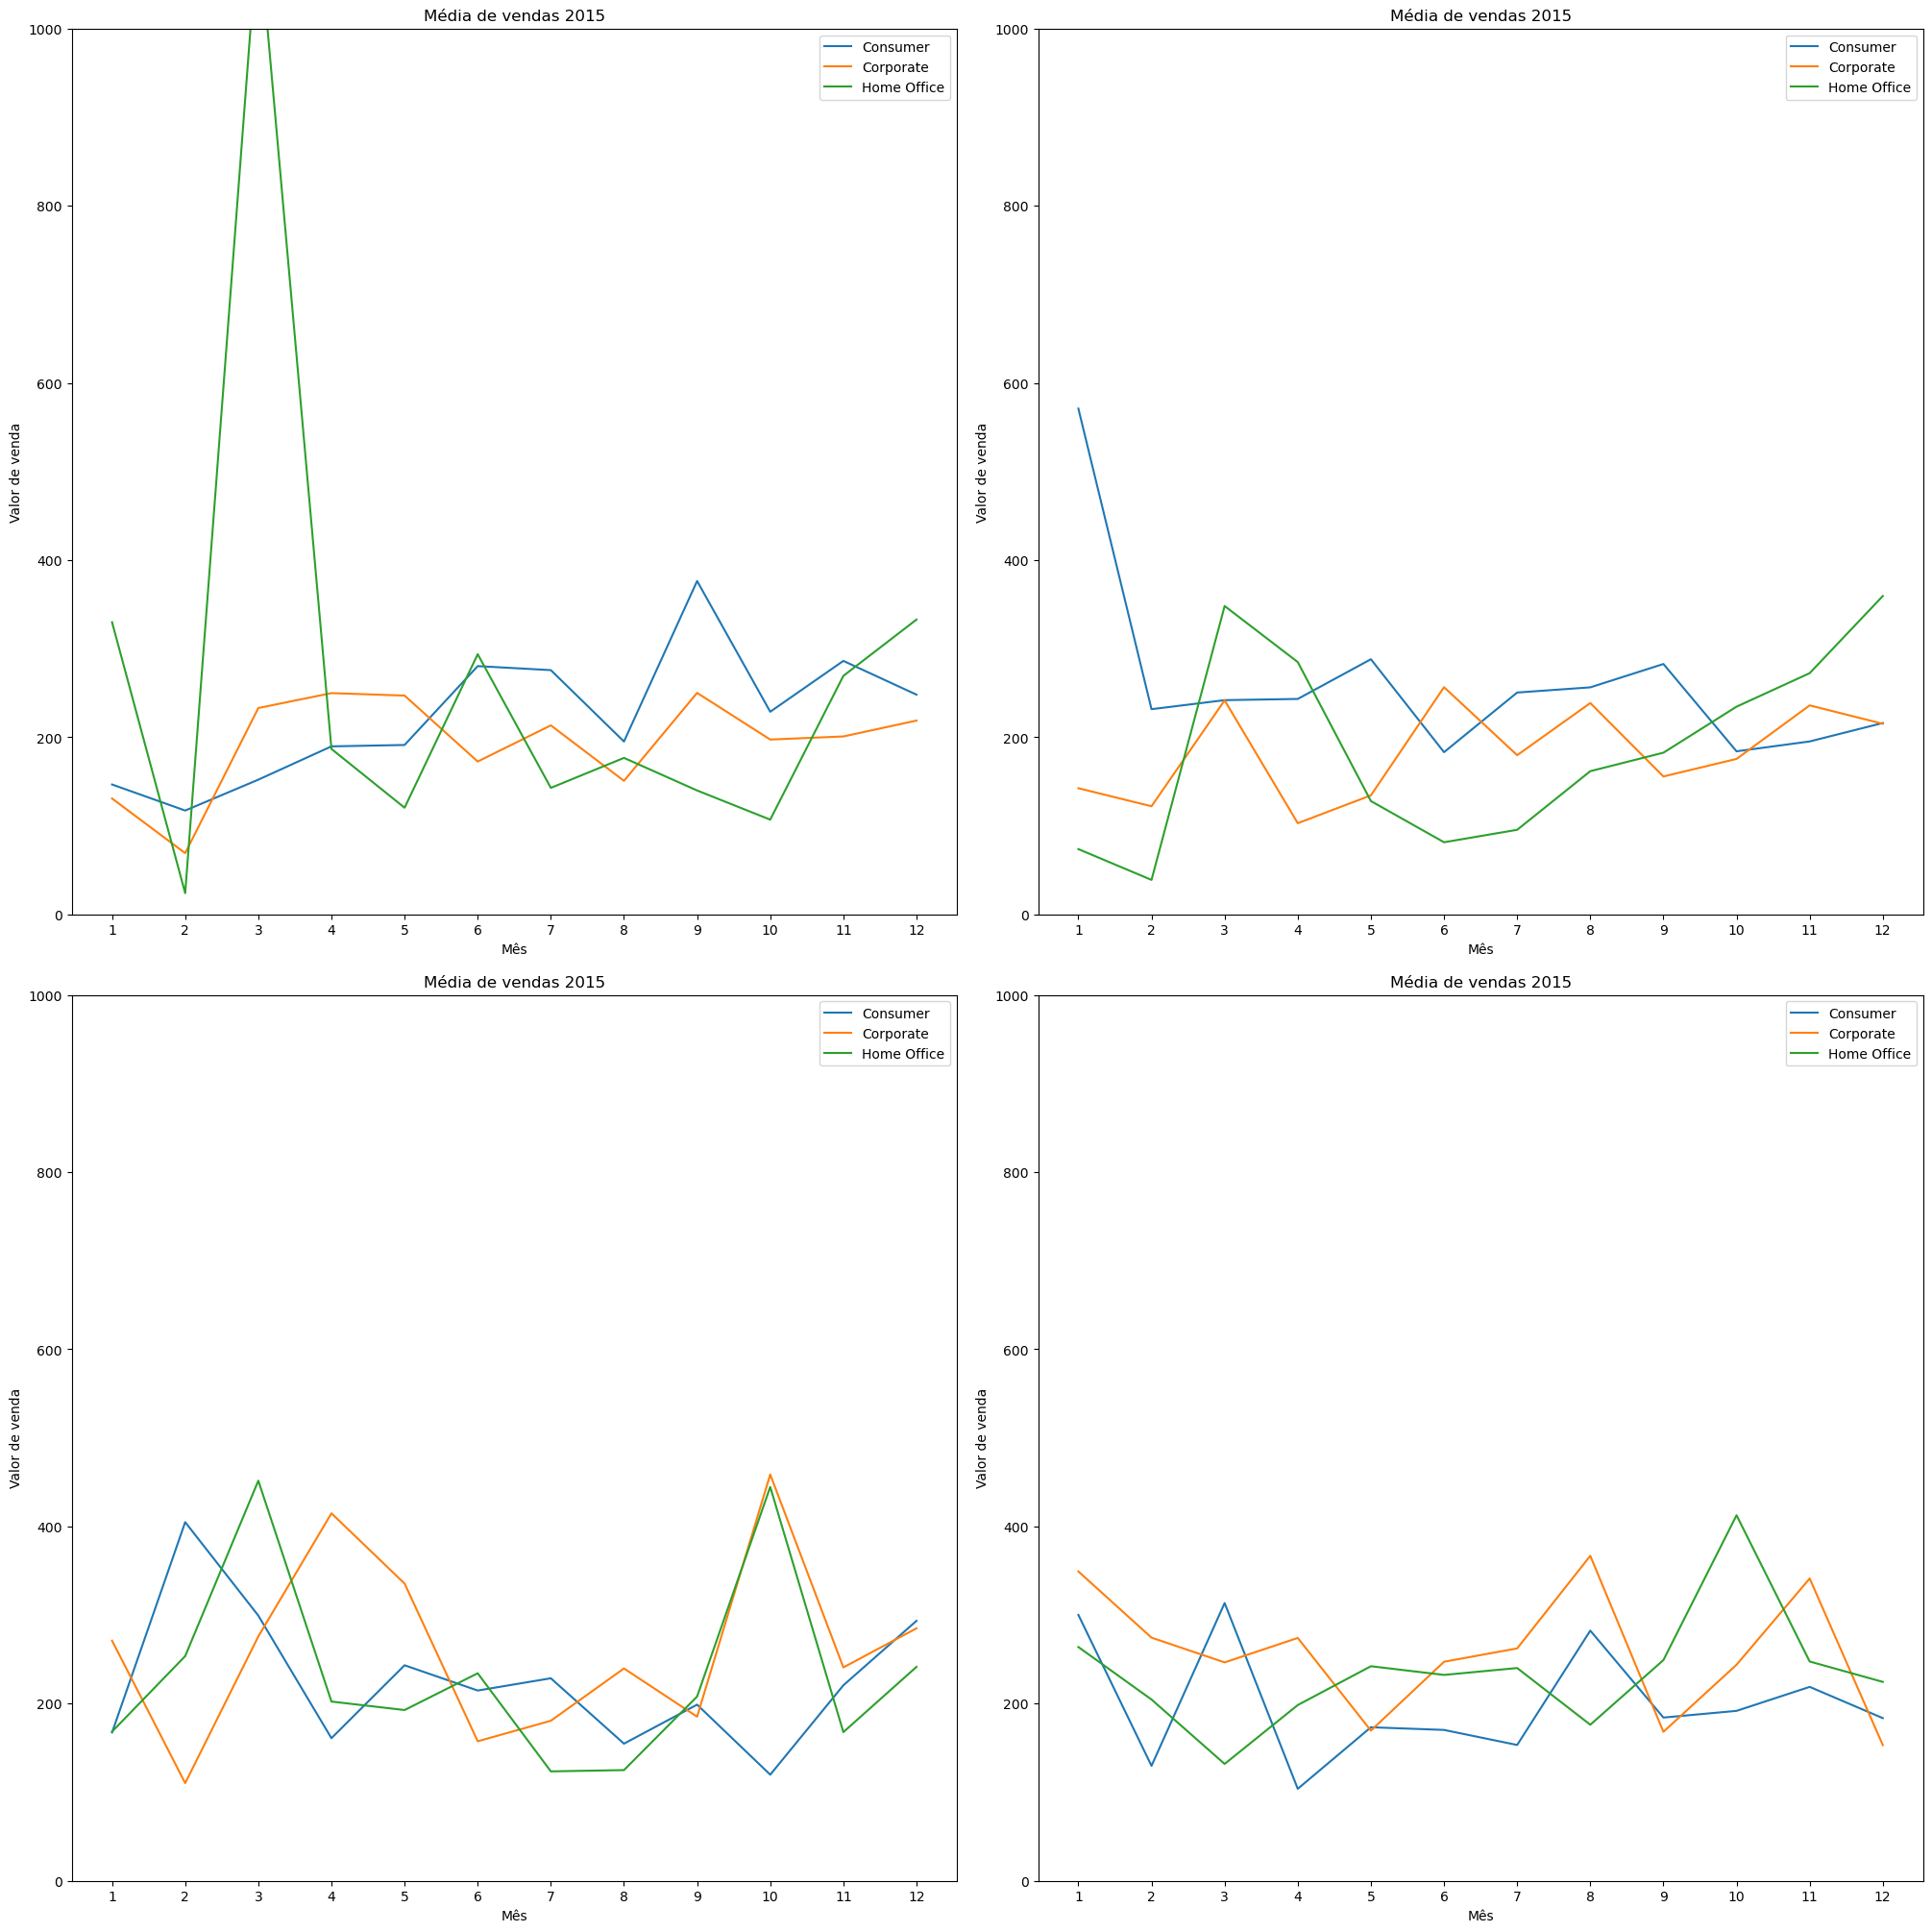

In [61]:
mes = np.arange(1,13,1)
segmentos = ['Consumer', 'Corporate', 'Home Office']
ano = [2015, 2016, 2017, 2018]
k = 0
fig, axs = plt.subplots(2,2, layout='constrained', figsize=(20,20))

for i in range(2):
    for j in range(2):
        ax = axs[i][j]
        for segmento in segmentos:
            ax.plot(mes, df_segmento_ano_mes.iloc[df_segmento_ano_mes.index.isin([(segmento,ano[k])])], label=segmento)
            
        ax.set_title('Média de vendas 2015')
        ax.set_xlabel('Mês')
        ax.set_ylabel('Valor de venda')
        ax.set_xticks(mes)
        ax.legend()
        ax.set_ylim(0,1000)
        k+=1


fig.align_labels() 
plt.show()

## Pergunta de negócio 10
### Qual o total de vendas Por categoria e subcategoria, considerando somente as top 12 subcategorias?
#### Demonstre tudo através de um único gráfico.

Para iniciar, primeiro é feito o agrupamento com a soma do valor de venda para cada subcategoria dentro de cada categoria.

In [64]:
df_categoria_subcategoria = df[['Categoria', 'SubCategoria', 'Valor_Venda']].groupby(['Categoria', 'SubCategoria']).sum()
df_categoria_subcategoria

Valor_Venda
Categoria       SubCategoria             
Furniture       Bookcases     108045.0467
                Chairs        317919.6250
                Furnishings    88862.7700
                Tables        202083.3600
Office Supplies Appliances    104061.6930
                Art            26573.7360
                Binders       194723.3810
                Envelopes      15791.1820
                Fasteners       3001.9600
                Labels         12267.3660
                Paper          76312.7640
                Storage       216188.3620
                Supplies       46177.3280
Technology      Accessories   162791.3620
                Copiers       146248.0940
                Machines      189238.6310
                Phones        325271.2940

Após isso, é feito uma organização por valor de venda de forma decrescente para serem extraídos os 12 maiores valores.

In [66]:
top12_subcategoria = df_categoria_subcategoria.sort_values('Valor_Venda',ascending=False)[:12]
top12_subcategoria

Valor_Venda
Categoria       SubCategoria             
Technology      Phones        325271.2940
Furniture       Chairs        317919.6250
Office Supplies Storage       216188.3620
Furniture       Tables        202083.3600
Office Supplies Binders       194723.3810
Technology      Machines      189238.6310
                Accessories   162791.3620
                Copiers       146248.0940
Furniture       Bookcases     108045.0467
Office Supplies Appliances    104061.6930
Furniture       Furnishings    88862.7700
Office Supplies Paper          76312.7640

Após isso, a própria função *plot.bar* do *Pandas* para o *plot* dos 12 melhores em gráfico.

<Axes: xlabel='Categoria,SubCategoria'>

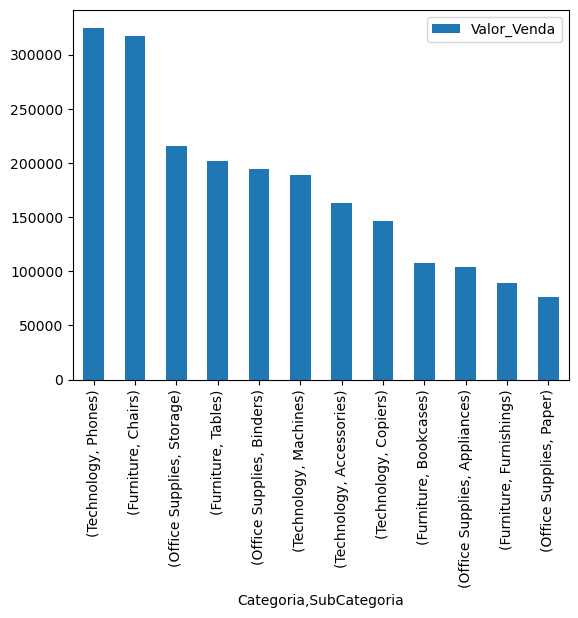

In [68]:
top12_subcategoria.plot.bar()